<a href="https://colab.research.google.com/github/dathrika13/cs666student/blob/main/CS666_Assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

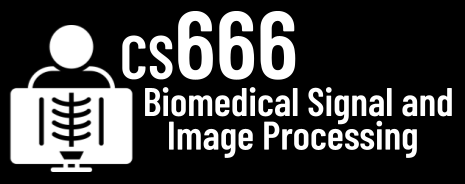

# Assignment 1

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


**Task 1** (10pts): Install the BioSPPY library with the following code.

In [2]:
!pip install biosppy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.0/107.0 KB 2.5 MB/s eta 0:00:00


**Task 2** (10 pts): Download a sample ecg dataset from https://cs666.org/data/ecg.txt and upload it to this colab. The following code loads the dataset.

In [3]:
from biosppy import storage
signal, metadata = storage.load_txt('/content/ecg.txt')

**Task 3** (10 pts): Figure out the sampling rate for this data and how many seconds it lasts.

In [4]:
SAMPLING_RATE = 1000 ### TODO!
#SECONDS = 0 ### TODO!

#no.of samples in the signals 
N = len(signal)

# Duration of the signal is N/SAMPLING_RATE
SECONDS = N/SAMPLING_RATE

In [5]:
SECONDS

15.0

**Task 4** (20 pts): Process the signal with BioSPPY using the `ecg.ecg` method.

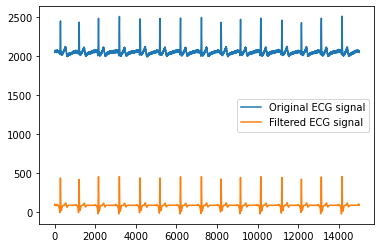

In [6]:
### TODO
import biosppy
import matplotlib.pyplot as plt

# process the signal using the ecg.ecg method
s_out = biosppy.signals.ecg.ecg(signal=signal, sampling_rate=SAMPLING_RATE, show=False)

# plot the Given signal and filtered signal
plt.plot(signal, label='Original ECG signal')
plt.plot(s_out['filtered'], label='Filtered ECG signal')
plt.legend()
plt.show()

**Task 5** (10 pts): Plot the first 3 seconds of the unfiltered signal and then the filtered signal. Can you spot the P, Q, R, S, T waves?

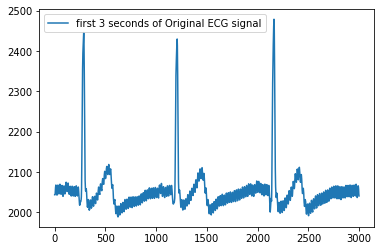

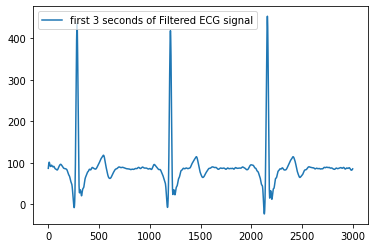

In [7]:
### TODO plot unfiltered signal
#plt.plot(signal, label='Unfiltered ECG signal')

plt.plot(signal[:3*SAMPLING_RATE], label='first 3 seconds of Original ECG signal')
plt.legend()
plt.show()

### TODO plot filtered signal
#plt.plot(s_out['filtered'], label='Filtered ECG signal')

plt.plot(s_out['filtered'][:3*SAMPLING_RATE], label='first 3 seconds of Filtered ECG signal')
plt.legend()
plt.show()

-> yes we can spot P Q R S T waves

**Task 6** (15 pts): Please plot the whole filtered signal and mark the r-peaks with vertical lines based on the ecg.ecg output. You can use `plt.axvline(x = 100, color = 'r', ls=':')` to create a red, dashed vertical line at position 100. Please label the x-axis as 'time [s]'.

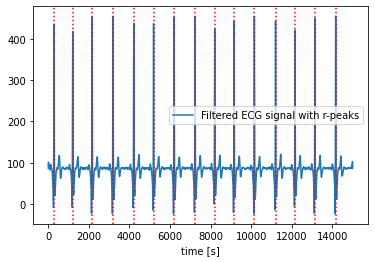

In [8]:
### TODO
plt.plot(s_out['filtered'], label='Filtered ECG signal with r-peaks')
# mark the R-peaks with vertical lines
for rpeak in s_out['rpeaks']:
    plt.axvline(x=rpeak, color='r', ls=':')

# label the x-axis as 'time [s]'
plt.xlabel('time [s]')

plt.legend()
plt.show()

**Task 7** (5 pts): Let's install the NeuroKit2 library.

In [9]:
!pip install neurokit2
import neurokit2 as nk

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 18.0 MB/s eta 0:00:00


**Task 8** (20 pts): Detect P Q S T Peaks using Neurokit.

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(1900.0, 2631.3)

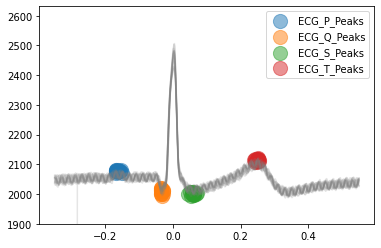

In [10]:
# We know the R spikes now but what about P Q S T waves?
# TODO Can you use nk.ecg_delineate to detect them in the unfiltred signal?
# Hint: Look at the tutorial: https://neuropsychology.github.io/NeuroKit/examples/ecg_delineate/ecg_delineate.html
# Hint 2: The plot will have blue, orange, green, and red circles :)
# Hint 3: rpeaks were detected above from biosppy's ecg.ecg method

#_, rpeaks = nk.ecg_peaks(signal, sampling_rate=SAMPLING_RATE)

rpeaks = s_out[2]
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')
plt.ylim(1900)


In [11]:
# TODO Does the detection work well?

answer : The detection worked well I guess. But as the signal is not filtered, the signal has peaks at two instants and the detector plotted approximated ones.
Like when you look at ECQ_Q_Peak(in orange) and ECG_T_Peaks(in Red) it plotted exact peaks where as other two peaks are not so exact but it is pretty well.

**Bonus Task** (33 pts): Detect P Q S T Peaks for the full signal before and after filtering.

(0.0, 2500.0)

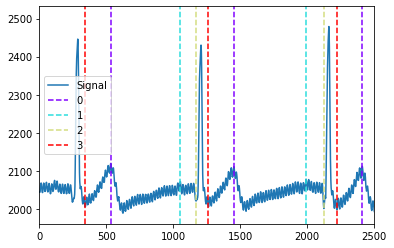

In [12]:
# TODO As above use the nk.ecg_delineate function to detect peaks for the whole signal

# P Q S T Peaks for the full origial signal 
_, waves_peak = nk.ecg_delineate(signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak")

plot = nk.events_plot([waves_peak['ECG_T_Peaks'], 
                       waves_peak['ECG_P_Peaks'],
                       waves_peak['ECG_Q_Peaks'],
                       waves_peak['ECG_S_Peaks']], signal)

plt.xlim(0, 2500)

# ECG P PEAK is light blue
# ECG Q PEAK is yellow
# ECG S PEAK is red
# ECG-T PEAK is voilet

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


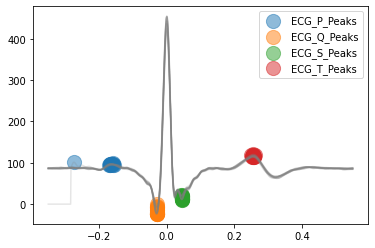

In [13]:
# P Q S T peaks for filtered signal
_, waves_peak = nk.ecg_delineate(s_out['filtered'], 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')

In [ ]:
# TODO Let's filter the signal and see if the detection improves.
# Hint: You can use nk.signal_filter to define a bandpass. 
# Hint 2: Which lowcut and highcut frequencies work well? Play with it :)
# Hint 3: You don't need to re-calculate the rpeaks since they are pretty accurate in general.

(0.0, 4000.0)

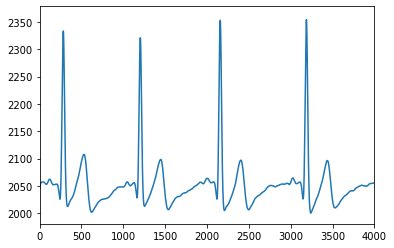

In [17]:
BPF_Signal= nk.signal_filter(signal, sampling_rate=SAMPLING_RATE, lowcut=0, highcut=18)
plt.plot(BPF_Signal)
plt.xlim(0, 4000)

#I took lowcut value to 0 so that it can efficiently pass frequencies at or 
# below 0 Hz. and by taking high cut value between 15-20 Hz we can 
#efficiently cut the lower frequencies below that range and get 
#desired/ filtered output.so i took high cut value as 15Hz.

# so, the signal will only allow frequencies between 0 and 15 hz as below.

In [ ]:
# Finally, run the delineation on the filtered signal from BioSPPY.

(0.0, 2500.0)

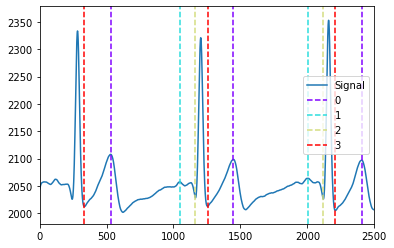

In [18]:
_, BPF_waves_peak = nk.ecg_delineate(BPF_Signal, rpeaks, sampling_rate=SAMPLING_RATE, method="peak")
plot = nk.events_plot([ BPF_waves_peak['ECG_T_Peaks'], 
                       BPF_waves_peak['ECG_P_Peaks'],
                       BPF_waves_peak['ECG_Q_Peaks'],
                       BPF_waves_peak['ECG_S_Peaks']], BPF_Signal)
plt.xlim(0, 2500)


/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:5238: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


(1900.0, 2440.758309466411)

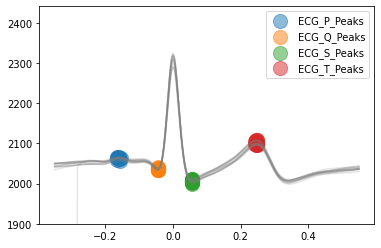

In [16]:
_,BPF_waves_peak = nk.ecg_delineate(BPF_Signal, 
                                 rpeaks, 
                                 sampling_rate=SAMPLING_RATE, 
                                 method="peak", 
                                 show=True, 
                                 show_type='peaks')
plt.ylim(1900)


In [ ]:
# TODO Which one works the best?

the filtered signal is accurate and easy to detect.

In [ ]:
#
# Great job!!
#
#  , ; ,   .-'"""'-.   , ; ,
#  \\|/  .'         '.  \|//
#   \-;-/   ()   ()   \-;-/
#   // ;               ; \\
#  //__; :.         .; ;__\\
# `-----\'.'-.....-'.'/-----'
#        '.'.-.-,_.'.'
#jgs       '(  (..-'
#            '-'
#

Thanks!